<a href="https://colab.research.google.com/github/arpedrig/UTA-PG-DataScience/blob/main/Final_USL_Trade%26Ahead_Arnold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
## Complete the code to import the data
from google.colab import drive
drive.mount('/content/drive')

# loading data
data= pd.read_csv('/content/drive/My Drive/GreatLearning/7. Unsupervised Learning/Project 7 - Trade&Ahead/stock_data.csv') ##  Complete the code to read the data


Mounted at /content/drive


## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
data.shape

#print(f"There are {'______'} rows and {'______'} columns.") ## Complete the code to get the shape of data

(340, 15)

### Displaying few rows of the dataset

In [ ]:
# let's view a sample of the data
#data.sample(n=10, random_state=1)
data.head(5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


### Checking the data types of the columns for the dataset

In [ ]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [ ]:
from pandas.core.base import value_counts
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

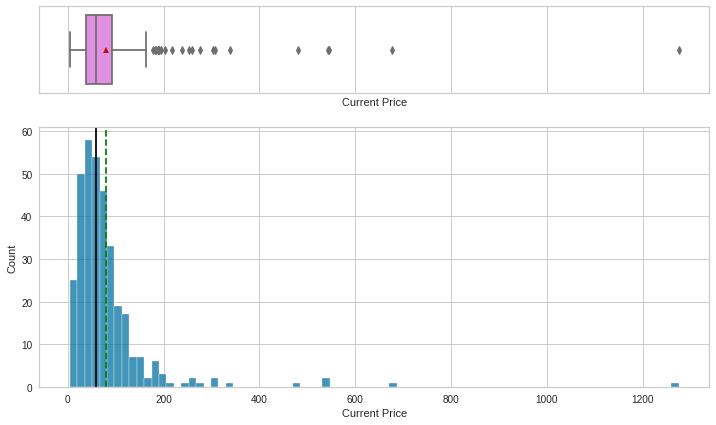

In [ ]:
histogram_boxplot(df, 'Current Price')

**`Price Change`**

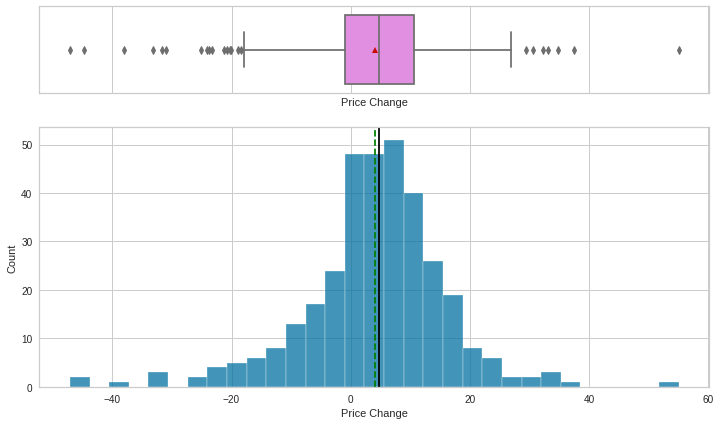

In [ ]:
histogram_boxplot(df,'Price Change')  ## Complete the code to create histogram_boxplot for 'Price Change'

**`Volatility`**

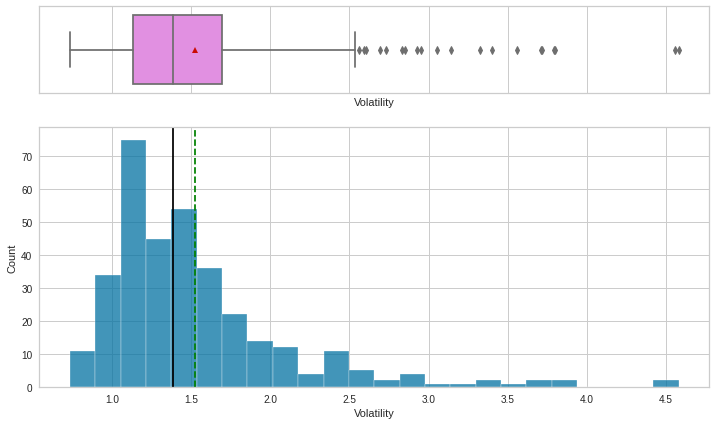

In [ ]:
histogram_boxplot(df,'Volatility')  ## Complete the code to create histogram_boxplot for 'Volatility'

**`ROE`**

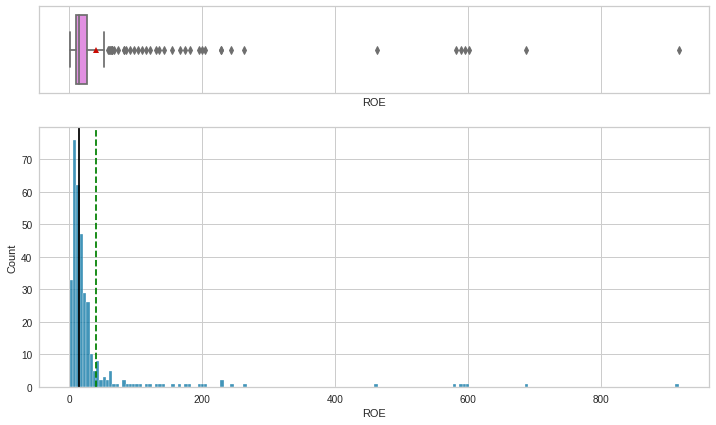

In [ ]:
histogram_boxplot(df,'ROE')  ## Complete the code to create histogram_boxplot for 'ROE'

**`Cash Ratio`**

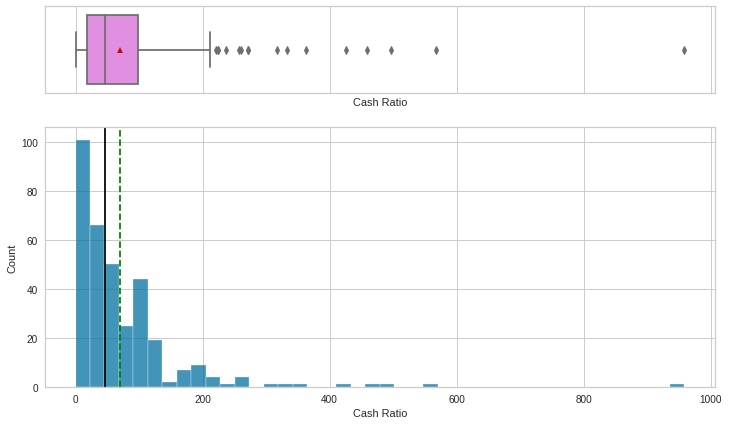

In [ ]:
histogram_boxplot(df,'Cash Ratio')  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

**`Net Cash Flow`**

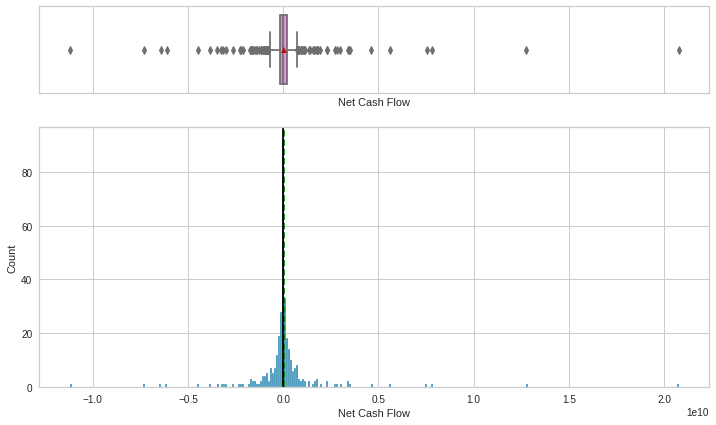

In [ ]:
histogram_boxplot(df,'Net Cash Flow')  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

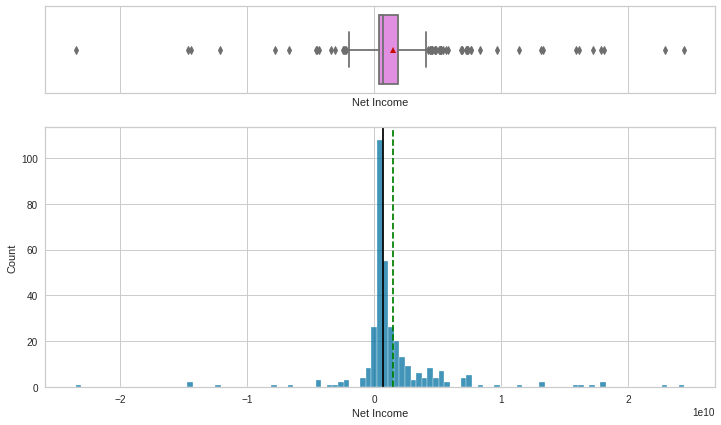

In [ ]:
histogram_boxplot(df,'Net Income')  ## Complete the code to create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

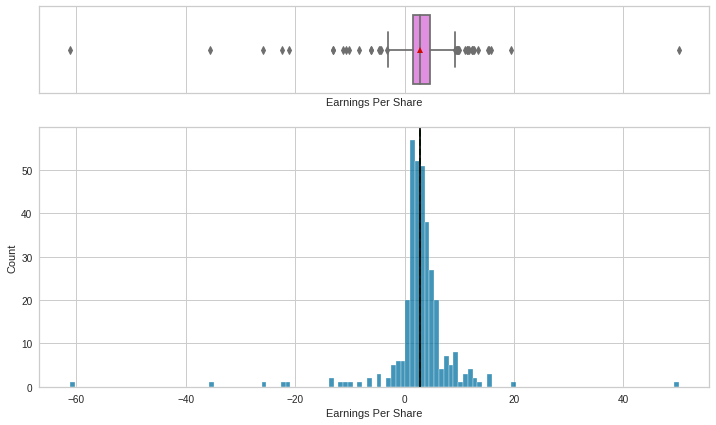

In [ ]:
histogram_boxplot(df,'Earnings Per Share')  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

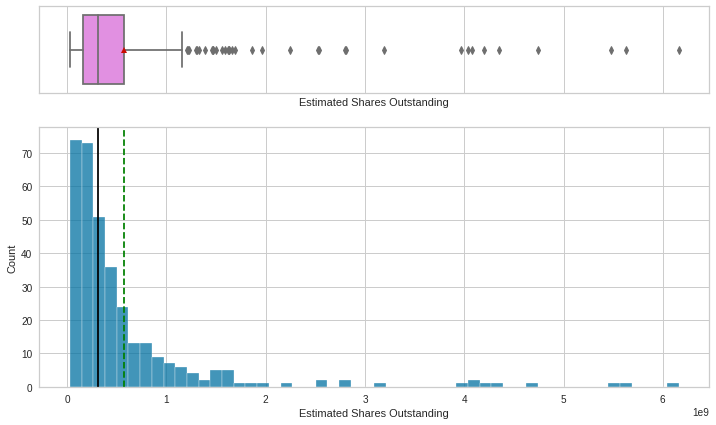

In [ ]:
histogram_boxplot(df,'Estimated Shares Outstanding')  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

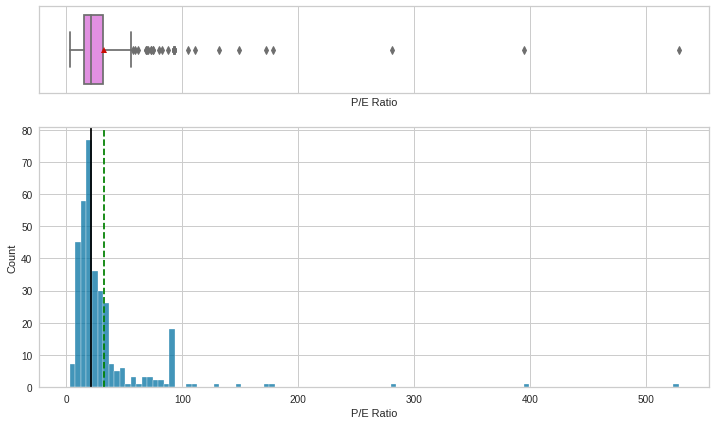

In [ ]:
histogram_boxplot(df,'P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

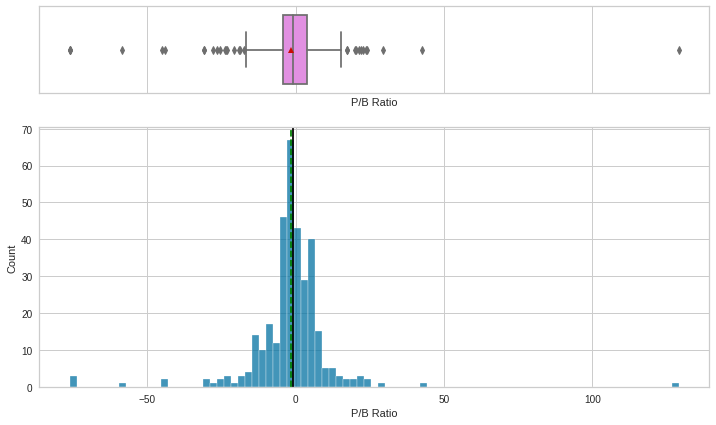

In [ ]:
histogram_boxplot(df,'P/B Ratio')  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

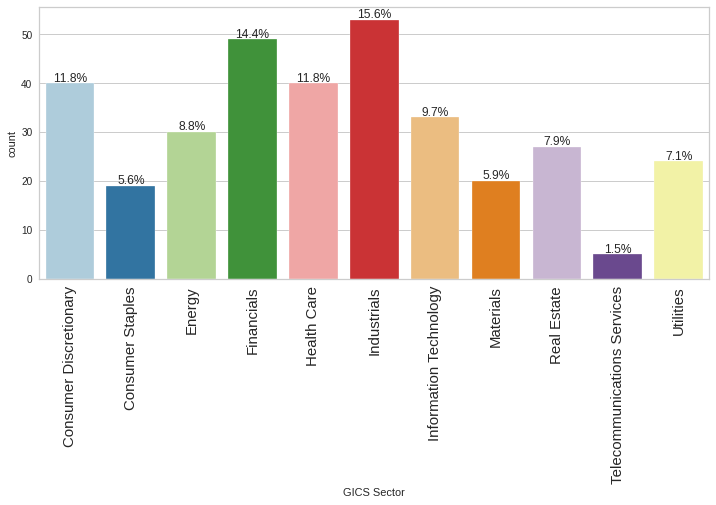

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

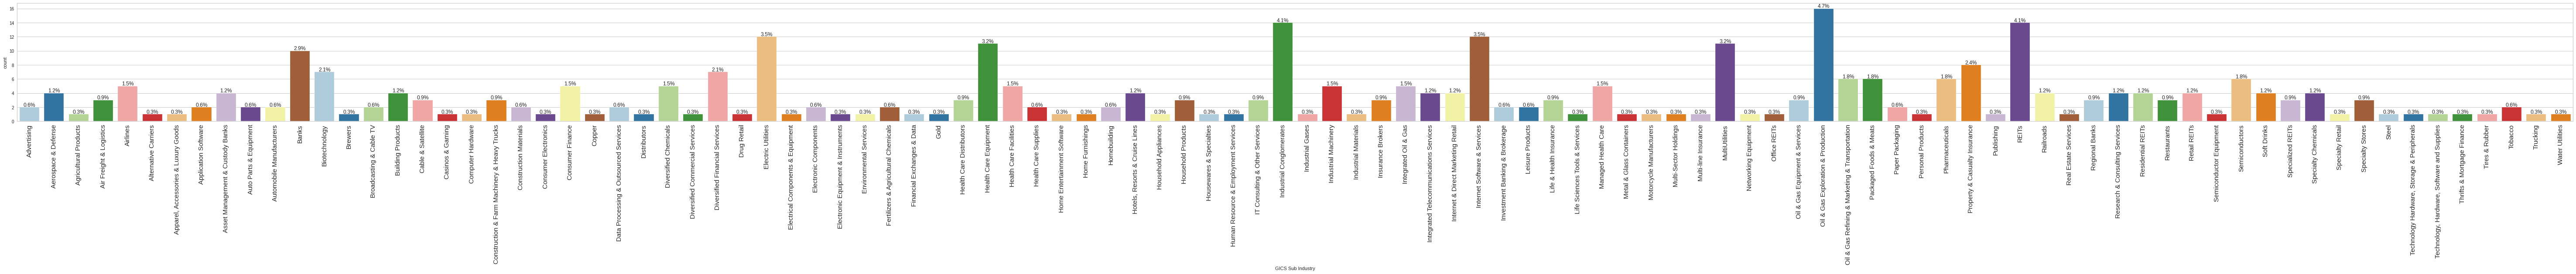

In [ ]:
labeled_barplot(df,'GICS Sub Industry',perc=True)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

### Bivariate Analysis

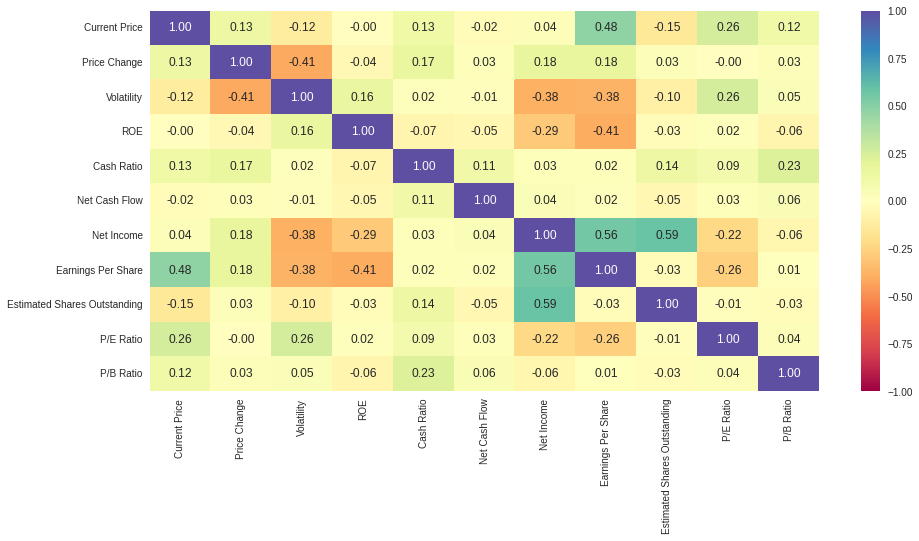

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

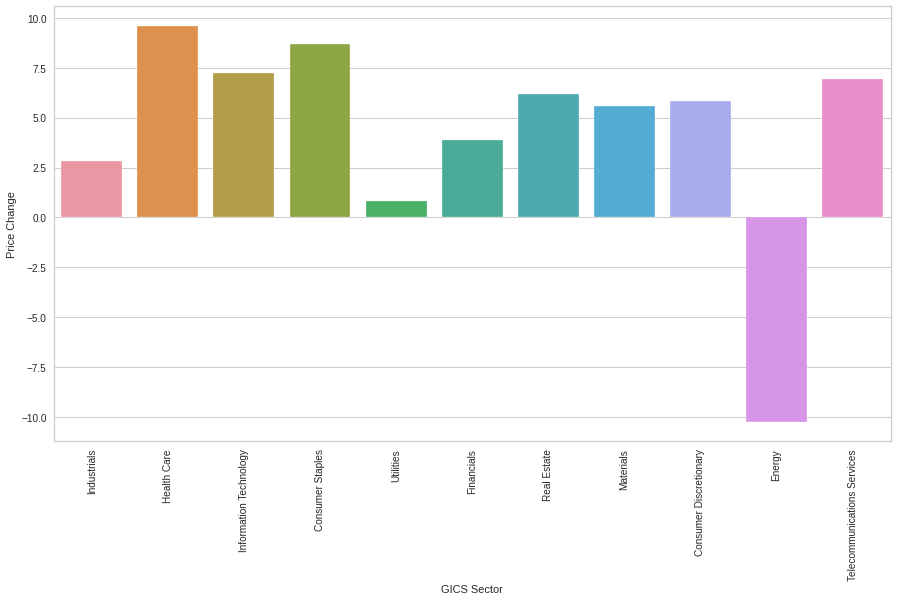

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change',ci=False) ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

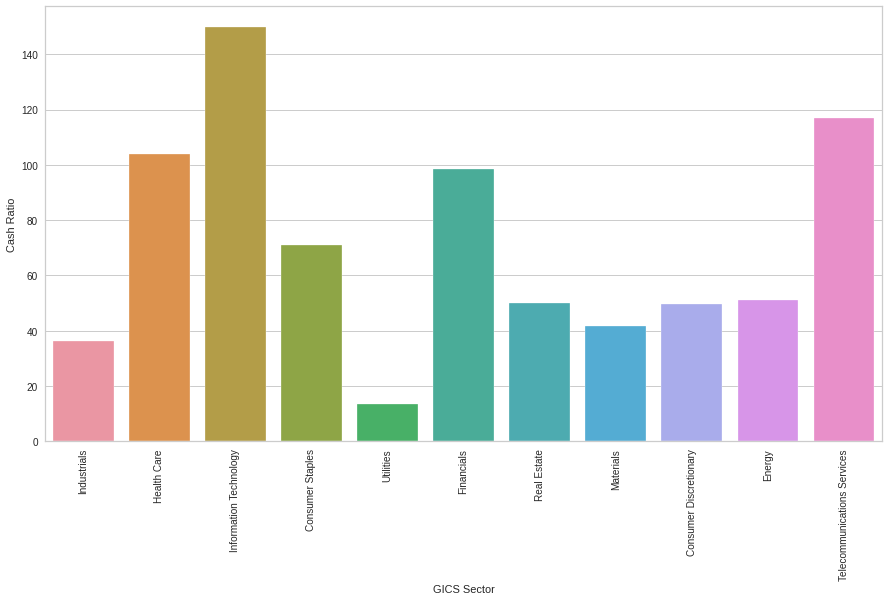

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

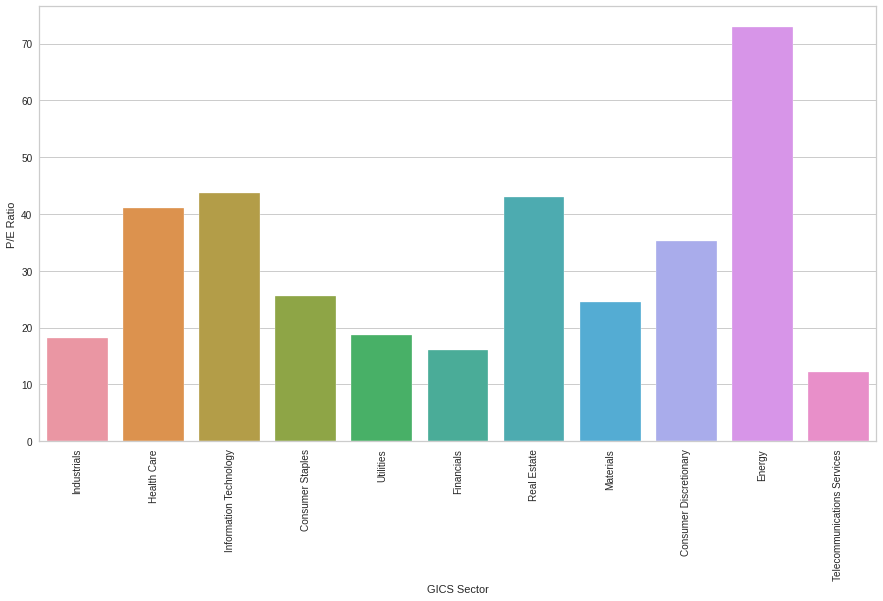

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

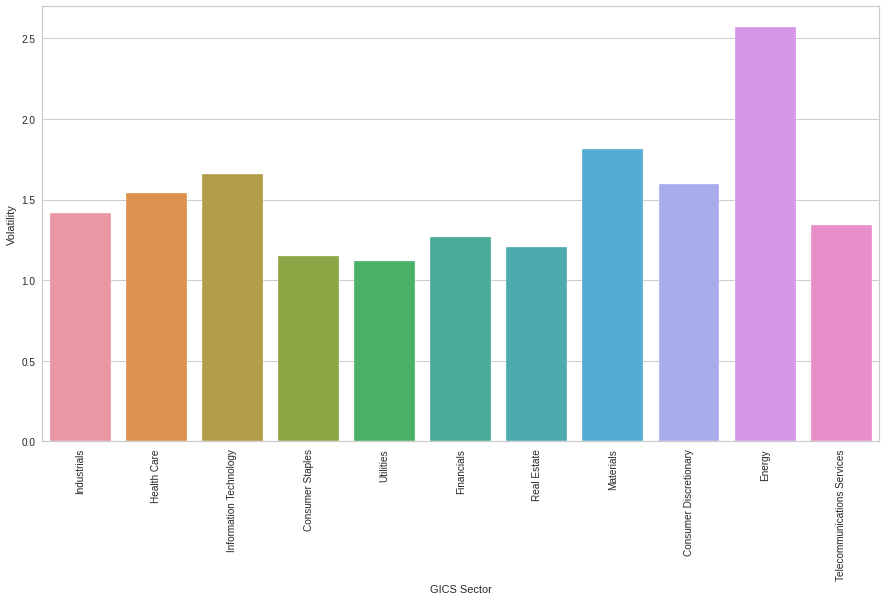

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

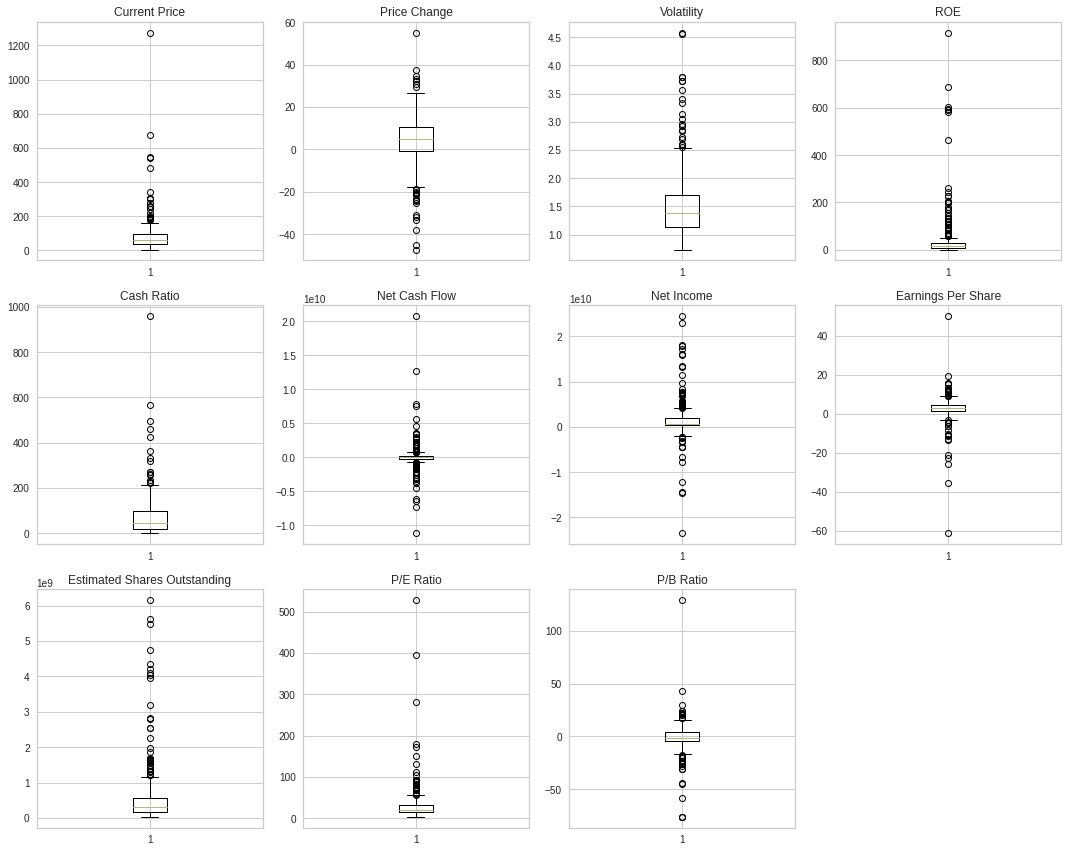

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
#arnold - remove outliers first
idx_manual = np.where(df['Current Price']>400)[0]
df_noOutlier = df.drop(idx_manual)

In [ ]:
df_noOutlier.shape
df_noOutlier.info()
df_noOutlier.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 335 non-null    object 
 1   Security                      335 non-null    object 
 2   GICS Sector                   335 non-null    object 
 3   GICS Sub Industry             335 non-null    object 
 4   Current Price                 335 non-null    float64
 5   Price Change                  335 non-null    float64
 6   Volatility                    335 non-null    float64
 7   ROE                           335 non-null    int64  
 8   Cash Ratio                    335 non-null    int64  
 9   Net Cash Flow                 335 non-null    int64  
 10  Net Income                    335 non-null    int64  
 11  Earnings Per Share            335 non-null    float64
 12  Estimated Shares Outstanding  335 non-null    float64
 13  P/E R

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,335.000000,335.000000,335.000000,335.000000,335.000000,3.350000e+02,3.350000e+02,335.000000,3.350000e+02,335.000000,335.000000
mean,71.562619,4.025463,1.524480,39.931343,68.307463,5.706852e+07,1.502218e+09,2.553299,5.835875e+08,30.988109,-1.991865
std,50.784194,11.774456,0.593174,97.222989,89.328689,1.957303e+09,3.967821e+09,6.022640,8.501914e+08,35.346654,13.762400
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,37.980002,-1.012518,1.134211,9.500000,18.000000,-1.942710e+08,3.503725e+08,1.555000,1.637246e+08,14.862070,-4.458577
50%,59.209999,4.781379,1.384502,15.000000,46.000000,2.000000e+06,7.120000e+08,2.860000,3.129208e+08,20.819876,-1.121059
75%,91.134998,10.534366,1.691993,27.000000,99.000000,1.715405e+08,1.899000e+09,4.505000,5.892203e+08,31.566212,3.726753
max,339.130005,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,19.520000,6.159292e+09,394.413783,129.064585


In [ ]:
# scaling the data before clustering
num_cols = df_noOutlier.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
subset = df_noOutlier[num_cols].copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)
subset.shape

(335, 11)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)



## K-means Clustering

### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.6371169233291765
Number of Clusters: 2 	Average Distortion: 2.462291211761009
Number of Clusters: 3 	Average Distortion: 2.34762815684694
Number of Clusters: 4 	Average Distortion: 2.2641014090997085
Number of Clusters: 5 	Average Distortion: 2.218814077802618
Number of Clusters: 6 	Average Distortion: 2.101503328664094
Number of Clusters: 7 	Average Distortion: 2.061638071068916
Number of Clusters: 8 	Average Distortion: 2.005968030513406
Number of Clusters: 9 	Average Distortion: 1.9664249535380343
Number of Clusters: 10 	Average Distortion: 1.9151521353798928
Number of Clusters: 11 	Average Distortion: 1.8577147829930292
Number of Clusters: 12 	Average Distortion: 1.8293818694161799
Number of Clusters: 13 	Average Distortion: 1.7733186781612325
Number of Clusters: 14 	Average Distortion: 1.7533923099513804


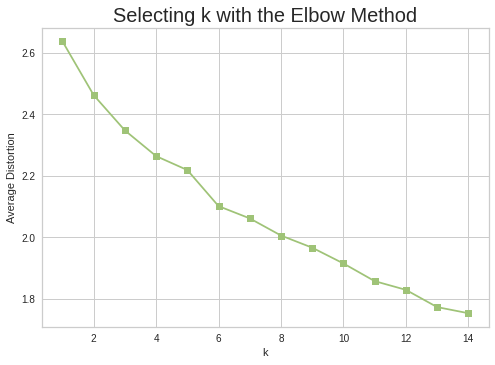

In [ ]:
clusters = range(1, 15) #arnold - original in the rubrik
#limit = int((k_means_df.shape[0]//2)**0.5) #arnold added this
#clusters = range(1,limit+1) #arnold - changed original to this

meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "gs-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

# arnold ------------------ added code below ----------    
# plotting the wcss values
# to find out the elbow value

#wcss = {}
# 
#for k in clusters:
#    model = KMeans(n_clusters=k)
#    model.fit(subset_scaled_df)
#    wcss[k] = model.inertia_
#
#plt.plot(wcss.keys(), wcss.values(), 'gs-')
#plt.xlabel('Values of "k"')
#plt.ylabel('WCSS')



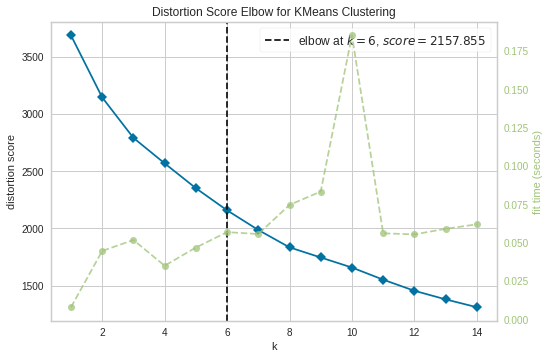

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.4368307333064924)
For n_clusters = 3, the silhouette score is 0.45048135695270103)
For n_clusters = 4, the silhouette score is 0.39045996029032415)
For n_clusters = 5, the silhouette score is 0.39454629836595934)
For n_clusters = 6, the silhouette score is 0.2231531035422687)
For n_clusters = 7, the silhouette score is 0.2536728013117188)
For n_clusters = 8, the silhouette score is 0.28903024111615516)
For n_clusters = 9, the silhouette score is 0.21506959157244443)
For n_clusters = 10, the silhouette score is 0.20280550254180513)
For n_clusters = 11, the silhouette score is 0.13641184424039135)
For n_clusters = 12, the silhouette score is 0.1486640490101402)
For n_clusters = 13, the silhouette score is 0.1397309893581168)
For n_clusters = 14, the silhouette score is 0.1629181357856925)


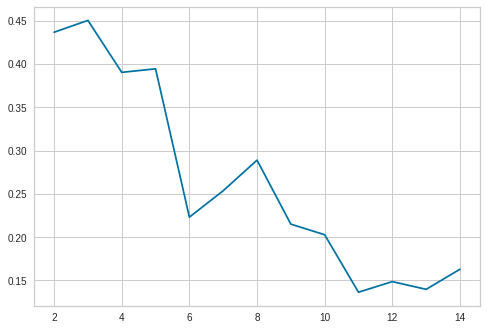

In [ ]:
sil_score = []
cluster_list = range(2, 15) #arnold
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

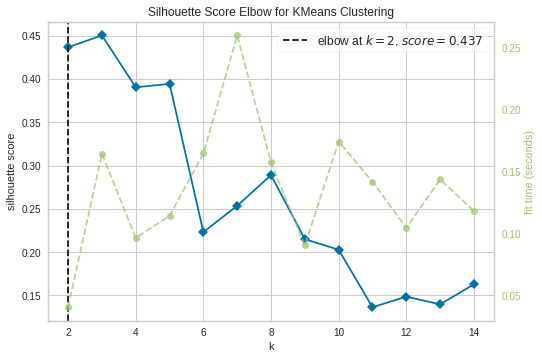

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

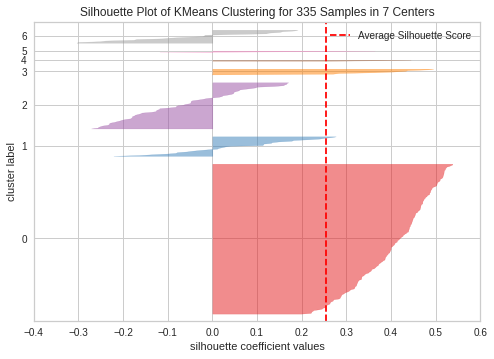

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df_noOutlier.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="black", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,131.277013,13.139143,1.696244,34.517241,251.517241,522527448.275862,897648758.620690,3.536552,580632427.613448,54.147440,10.817211,29
3,69.595579,4.901498,1.382687,34.312030,49.751880,-6702154.135338,1498791323.308271,3.598214,431387754.058083,23.138148,-3.616223,266


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.'
 'CF Indus

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     3
             Information Technology          1
             Telecommunications Services     2
1            Energy                         22
             Industrials                     1
             Information Technology          3
             Materials                       1
2            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Information Technology          9
             Materials                       2
             Real Estate                     2
             Telecommunications Services     1
3            Consum

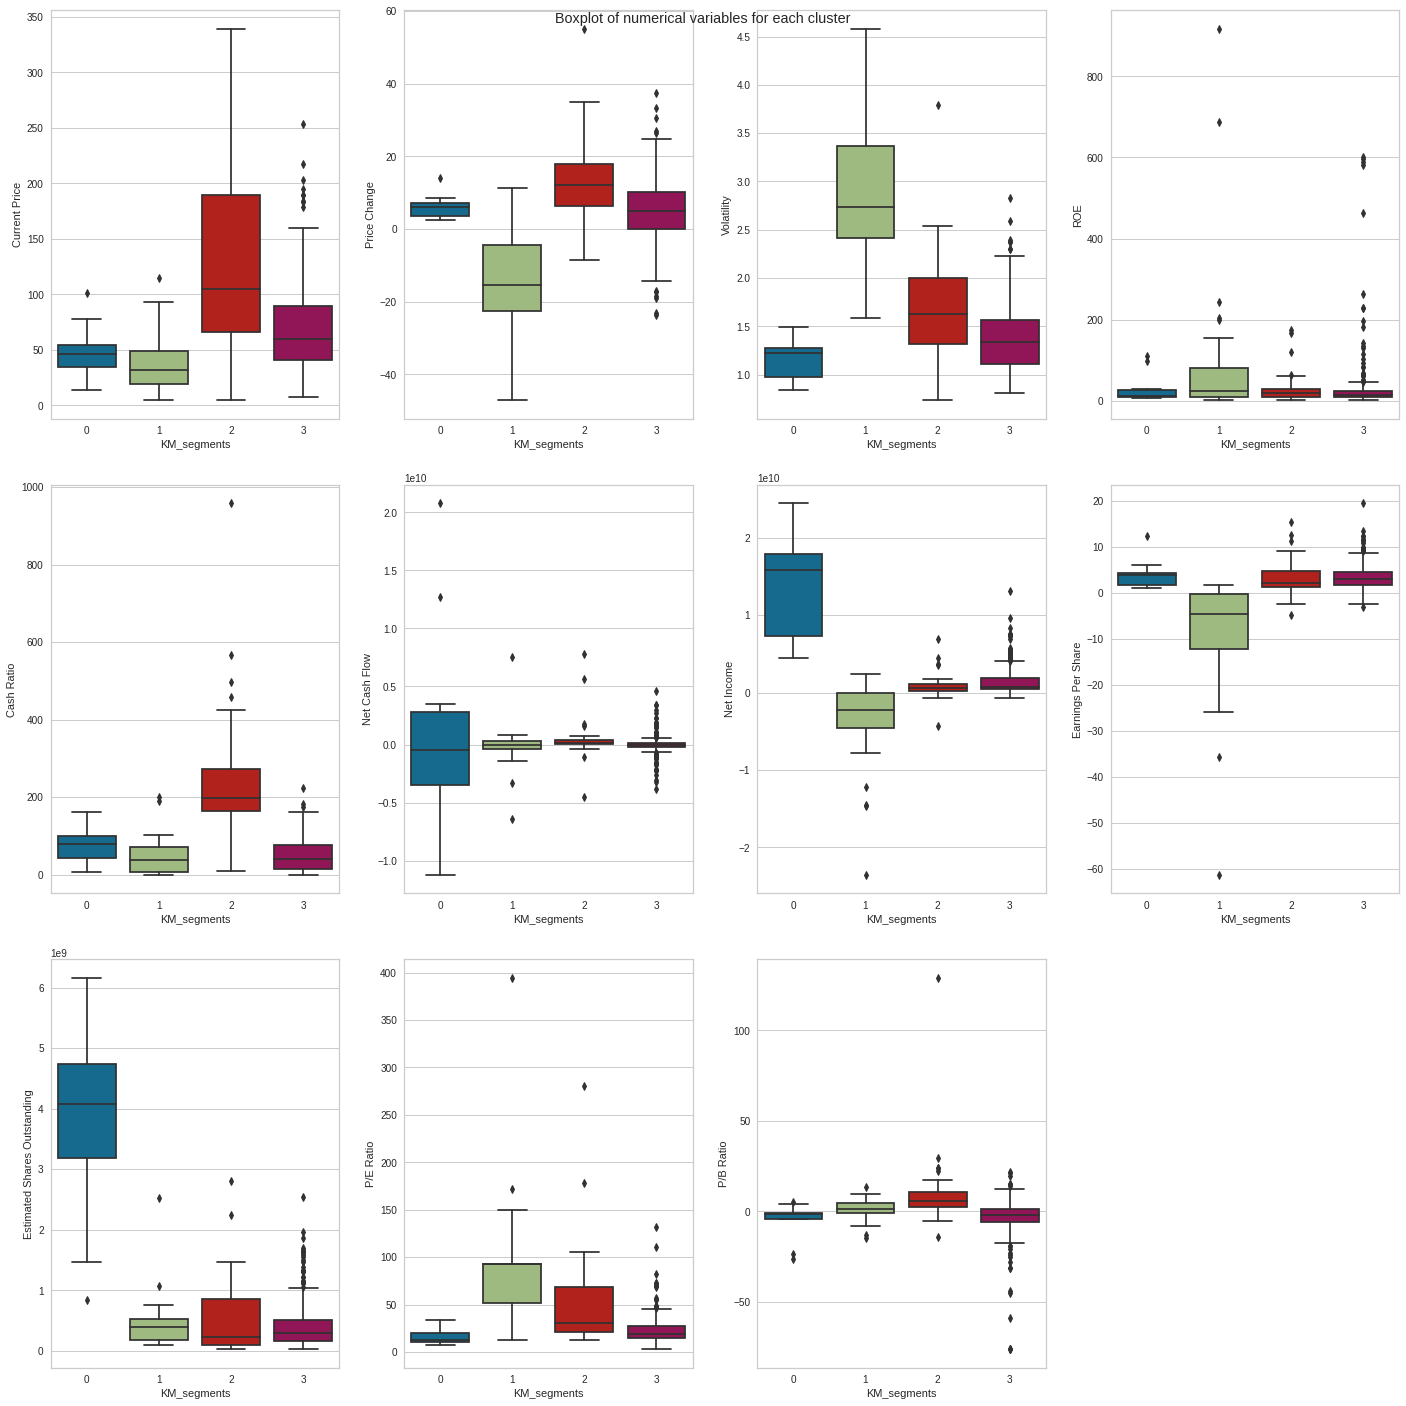

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- 


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9071229663688187.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8588066229767164.
Cophenetic correlation for Euclidean distance and average linkage is 0.9365339587518612.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.90319825037351.
Cophenetic correlation for Chebyshev distance and single linkage is 0.875918769195254.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.772942476231564.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9141781264555223.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9000374025782856.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9044739815761774.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7619025413193126.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9221271442887086.
Cophenetic correl

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9071229663688187.
Cophenetic correlation for complete linkage is 0.8588066229767164.
Cophenetic correlation for average linkage is 0.9365339587518612.
Cophenetic correlation for centroid linkage is 0.9386401613136229.
Cophenetic correlation for ward linkage is 0.5857246555057183.
Cophenetic correlation for weighted linkage is 0.90319825037351.
****************************************************************************************************
Highest cophenetic correlation is 0.9386401613136229, which is obtained with centroid linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

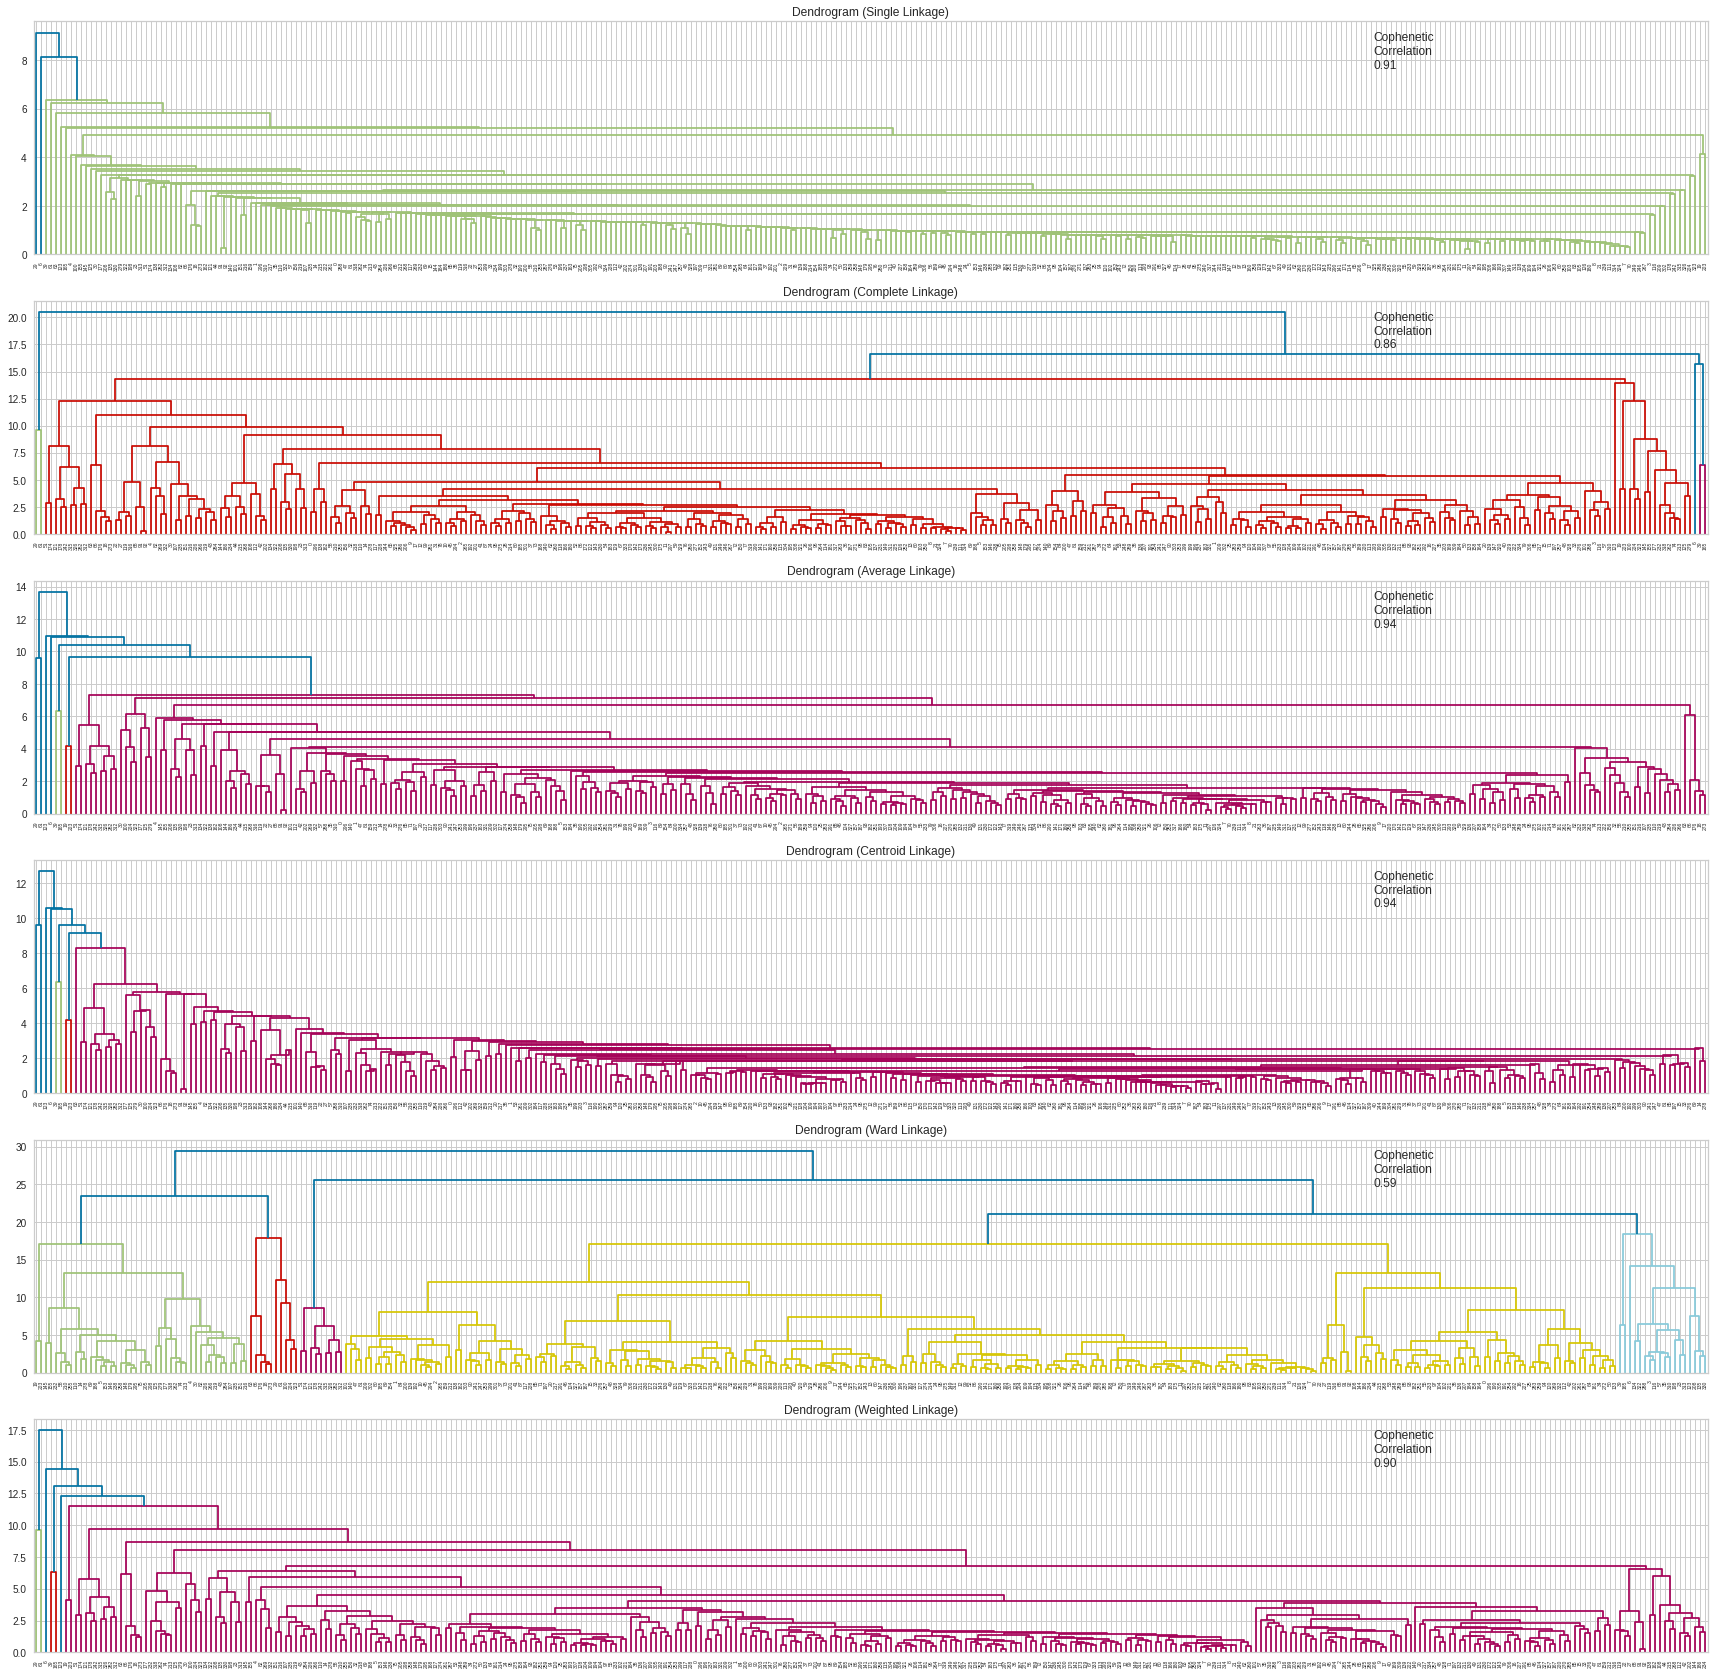

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(30, 30)) #15, 30

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.585725
1,complete,0.858807
5,weighted,0.903198
0,single,0.907123
2,average,0.936534
3,centroid,0.938640


### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='correlation',  linkage='average')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='correlation', linkage='average', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df_noOutlier.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="black", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,53.290887,14.218761,1.505606,19.044118,131.205882,-109137514.705882,850326044.117647,1.895000,603264602.233235,29.777560,1.574553,68
1,69.558950,3.492794,1.371880,28.585366,42.658537,-777919853.658537,5991333853.658537,4.541951,1600174802.475366,18.829317,-15.475961,41
2,50.027797,-3.144484,1.881393,19.600000,68.781818,134098000.000000,877362890.909091,2.938727,299800708.805636,18.175099,3.093191,55
3,74.021349,5.029988,1.210281,344.166667,32.333333,-227266916.666667,1383893416.666667,2.127500,516507767.220833,26.306497,-8.433079,12
4,98.365123,5.721582,1.192152,22.655738,47.131148,529266262.295082,1945862295.081967,4.904713,380761026.444508,22.299726,-1.528332,122
5,50.201352,-9.378281,2.395407,79.405405,61.918919,-291477081.081081,-2769751135.135135,-6.628649,533315189.452432,95.899067,-0.602752,37


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique(),"\n")

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'American International Group, Inc.' 'Affiliated Managers Group Inc'
 'Anthem Inc.' 'Citigroup Inc.' 'Carnival Corp.' 'CME Group Inc.'
 'CenturyLink Inc' 'CVS Health' 'Delta Air Lines' 'Danaher Corp.'
 'The Walt Disney Company' 'Discovery Communications-A'
 'Discovery Communications-C' 'Duke Energy' 'Eaton Corporation'
 'Expedia Inc.' 'Ford Motor' 'Fidelity National Information Services'
 'General Motors' "Honeywell Int'l Inc." 'International Business Machines'
 'JPMorgan Chase & Co.' 'Coca Cola Company' 'Lilly (Eli) & Co.'
 'Mastercard Inc.' "Marriott Int'l." 'Mondelez International'
 'Merck & Co.' 'Nielsen Holdings' 'Pfizer Inc.' 'Stericycle Inc'
 'AT&T Inc' 'United Continental Holdings' 'Verisk Analytics'
 'Verizon Communications' 'Wells Fargo' 'Whirlpool Corp.'
 'Exxon Mobil Corp.'] 

In cluster 0, the following companies are present:
['Adobe Systems Inc' 'Apartment Investm

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          7
             Consumer Staples                4
             Energy                          2
             Financials                     11
             Health Care                    11
             Industrials                     4
             Information Technology         14
             Materials                       4
             Real Estate                     8
             Telecommunications Services     2
             Utilities                       1
1            Consumer Discretionary          9
             Consumer Staples                3
             Energy                          1
             Financials                      6
             Health Care                     6
             Industrials                     9
             Information Technology          3
             Telecommunications Services     3
             Utilities                       1
2            Consum

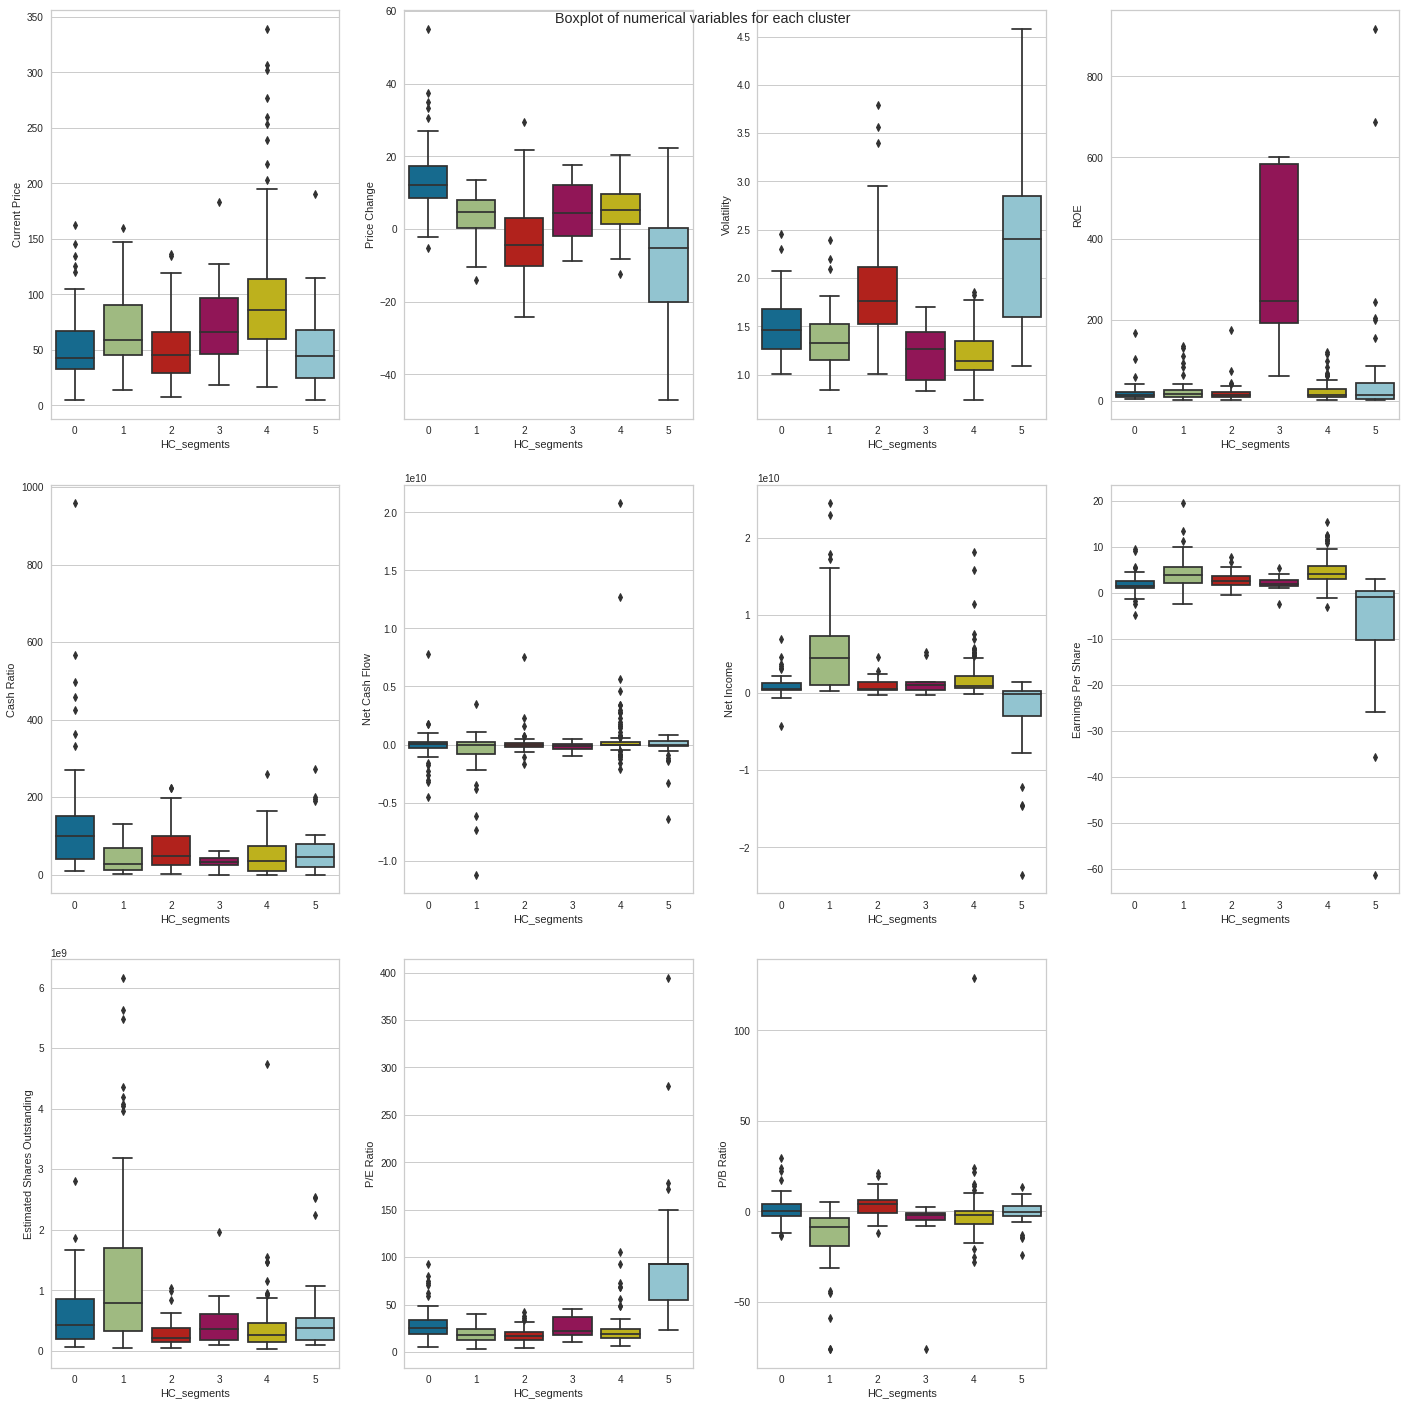

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

- 


___